In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from sklearn.metrics import classification_report,confusion_matrix

**Dataset Download Link**
[https://drive.google.com/file/d/1ULKLK_R0qsLho6PzfUIOwTXOStk3w5jd/view?usp=sharing](https://drive.google.com/file/d/1ULKLK_R0qsLho6PzfUIOwTXOStk3w5jd/view?usp=sharing)

In [2]:
# for Google Colab
my_data_dir = 'cell_images'

In [3]:
os.listdir(my_data_dir)

['test', 'train']

In [4]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [5]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [6]:
len(os.listdir(train_path+'/uninfected/'))

12479

In [7]:
len(os.listdir(train_path+'/parasitized/'))

12479

In [8]:
os.listdir(train_path+'/parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [9]:
para_img= imread(train_path+
                 '/parasitized/'+
                 os.listdir(train_path+'/parasitized')[0])
para_img.shape

(148, 142, 3)

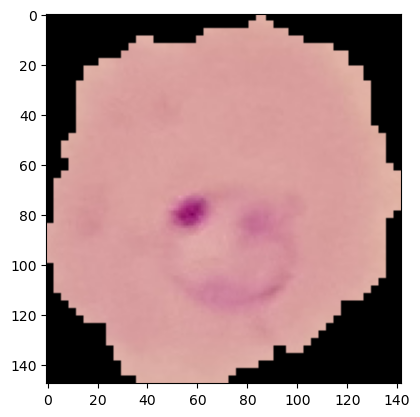

In [52]:
plt.imshow(para_img)

In [11]:
# Checking the image dimensions
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/uninfected'):
    img = imread(test_path+'/uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

w=max(set(dim1),key=dim1.count)
h=max(set(dim2),key=dim2.count)
image_shape = (w,h,3)

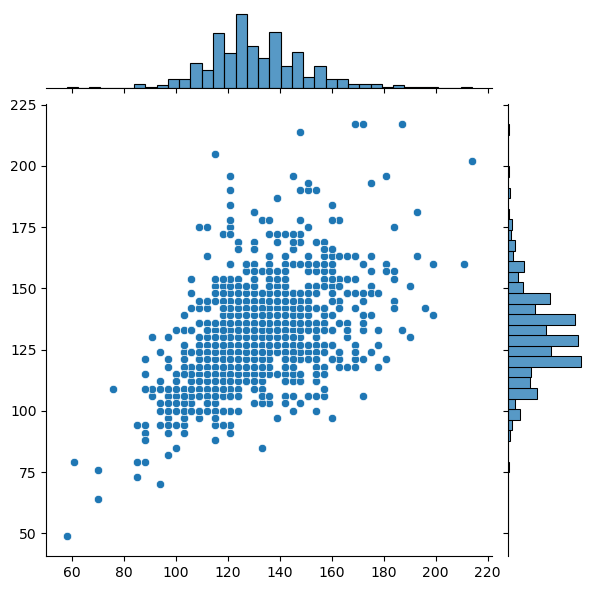

In [12]:
sns.jointplot(x=dim1,y=dim2)

In [13]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [14]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [15]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Dense
model=Sequential()
model.add(layers.Input(shape= image_shape))
model.add(Conv2D(64,kernel_size=(5,5),activation='relu'))
model.add(layers.MaxPool2D())
model.add(Conv2D(32,kernel_size=(5,5),activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [17]:
model.summary()

Model: "sequential"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


conv2d (Conv2D)              (None, 126, 120, 64)      4864      

_________________________________________________________________

max_pooling2d (MaxPooling2D) (None, 63, 60, 64)        0         

_________________________________________________________________

conv2d_1 (Conv2D)            (None, 59, 56, 32)        51232     

_________________________________________________________________

max_pooling2d_1 (MaxPooling2 (None, 29, 28, 32)        0         

_________________________________________________________________

flatten (Flatten)            (None, 25984)             0         

_________________________________________________________________

dense (Dense)                (None, 16)                415760    

_________________________________________________________________

dense_1 (Dense)              (None, 1)  

In [18]:
batch_size = 16

In [19]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [20]:
train_image_gen.batch_size

16

In [21]:
len(train_image_gen.classes)

24958

In [22]:
train_image_gen.total_batches_seen

0

In [23]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [24]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [25]:
results = model.fit(train_image_gen,epochs=10,
                              validation_data=test_image_gen
                             )

Epoch 1/10

1560/1560 [==============================] - 356s 228ms/step - loss: 0.6838 - accuracy: 0.5606 - val_loss: 0.6924 - val_accuracy: 0.5162

Epoch 2/10

1560/1560 [==============================] - 344s 220ms/step - loss: 0.5587 - accuracy: 0.7019 - val_loss: 0.2866 - val_accuracy: 0.9054

Epoch 3/10

1560/1560 [==============================] - 352s 226ms/step - loss: 0.2382 - accuracy: 0.9205 - val_loss: 0.2434 - val_accuracy: 0.9273

Epoch 4/10

1560/1560 [==============================] - 341s 219ms/step - loss: 0.2216 - accuracy: 0.9288 - val_loss: 0.2297 - val_accuracy: 0.9254

Epoch 5/10

1560/1560 [==============================] - 344s 221ms/step - loss: 0.2077 - accuracy: 0.9323 - val_loss: 0.2398 - val_accuracy: 0.9246

Epoch 6/10

1560/1560 [==============================] - 347s 222ms/step - loss: 0.2014 - accuracy: 0.9353 - val_loss: 0.2238 - val_accuracy: 0.9285

Epoch 7/10

1560/1560 [==============================] - 341s 219ms/step - loss: 0.1952 - accuracy: 

In [26]:
model.save('cell_model.h5')

In [27]:
losses = pd.DataFrame(model.history.history)

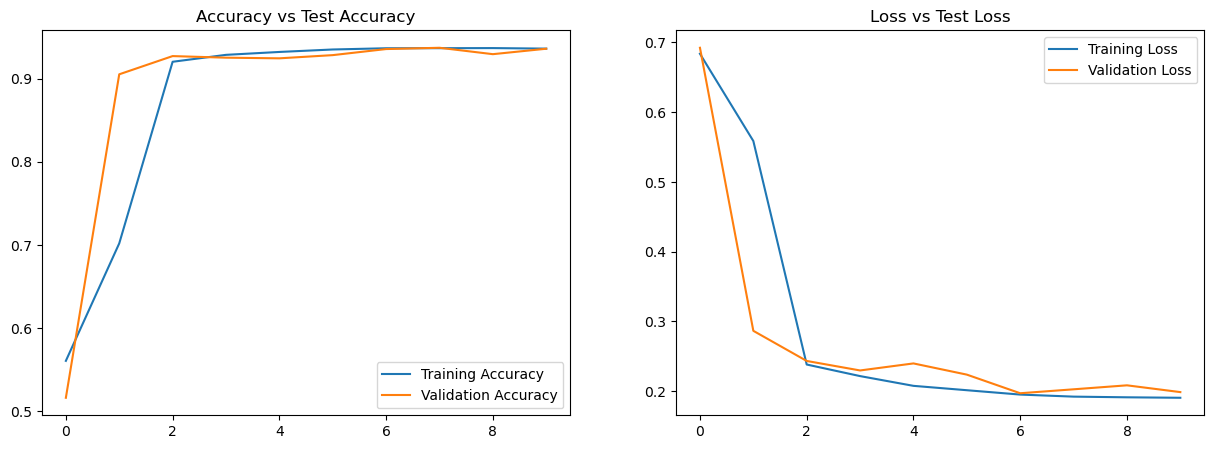

In [28]:

import matplotlib.pyplot as plt
import pandas as pd
metrics=pd.DataFrame(model.history.history)
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(metrics[['accuracy','val_accuracy']])
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.title("Accuracy vs Test Accuracy")
plt.subplot(1,2,2)
plt.plot(metrics[['loss','val_loss']])
plt.legend(["Training Loss","Validation Loss"])
plt.title("Loss vs Test Loss")
plt.show()

In [29]:
model.metrics_names

['loss', 'accuracy']

In [30]:
model.evaluate(test_image_gen)

163/163 [==============================] - 20s 122ms/step - loss: 0.2145 - accuracy: 0.9312


[0.21450288593769073, 0.9311538338661194]

In [31]:
pred_probabilities = model.predict(test_image_gen)

In [32]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [33]:
predictions = pred_probabilities > 0.5

In [34]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support



           0       0.96      0.92      0.94      1300

           1       0.92      0.96      0.94      1300



    accuracy                           0.94      2600

   macro avg       0.94      0.94      0.94      2600

weighted avg       0.94      0.94      0.94      2600




In [40]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1190,  110],
       [  52, 1248]], dtype=int64)

In [51]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
import random
list_dir=["uninfected","parasitized"]
dir_=(random.choice(list_dir))
para_img= imread(train_path+
                 '/'+dir_+'/'+
                 os.listdir(train_path+'/'+dir_)[random.randint(0,10000)])
img  = tf.convert_to_tensor(np.asarray(para_img))
img = tf.image.resize(img,(130,130))
img=img.numpy()
pred=bool(model.predict(img.reshape(1,130,130,3))<0.5 )
plt.title("Model prediction: "+("Parasitized" if pred  else "Uninfected")+"\nActual Value: "+str(dir_))
plt.axis("off")
plt.imshow(img)
plt.show()